In [2]:
# CS320 - Module 05: Logistic Regression with scikit-learn
# Author: (Your Name)
# Date: (e.g., 2025-07-18)

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()
print("Feature Names:", data.feature_names[:5])  # just first 5
print("Target Names:", data.target_names)
print("Data Shape:", data.data.shape)
print("Target Shape:", data.target.shape)
print("\nSample Data (first row):\n", data.data[0])
print("\nSample Target (first 10):\n", data.target[:10])

X_linear = data.data[:100, 25:]  # last 5 features, first 100 samples
y_linear = data.target[:100]
linearModel = LinearRegression()
linearModel.fit(X_linear, y_linear)

x_sample = data.data[10, 25:].reshape(1, -1)  # reshape required
prediction_linear = linearModel.predict(x_sample)
print("\nLinear Regression Prediction:", prediction_linear)

X_logit = data.data[:100, 25:]
y_logit = data.target[:100]
logitModel = LogisticRegression(max_iter=10000)
logitModel.fit(X_logit, y_logit)

prediction_logit = logitModel.predict(x_sample)
print("\nLogistic Regression Prediction:", prediction_logit)

X_all = data.data[:, 25:]
y_all = data.target
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, random_state=42)
logitModelFull = LogisticRegression(max_iter=10000)
logitModelFull.fit(X_train, y_train)
accuracy_full = logitModelFull.score(X_test, y_test)
print("\nAccuracy with all features:", accuracy_full)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Target Names: ['malignant' 'benign']
Data Shape: (569, 30)
Target Shape: (569,)

Sample Data (first row):
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]

Sample Target (first 10):
 [0 0 0 0 0 0 0 0 0 0]

Linear Regression Prediction: [0.59073061]

Logistic Regression Prediction: [1]

Accuracy with all features: 0.8671328671328671


Section 2 Vibe coding


Top 5 Important Features: ['mean smoothness' 'mean area' 'mean radius' 'mean perimeter'
 'mean texture']


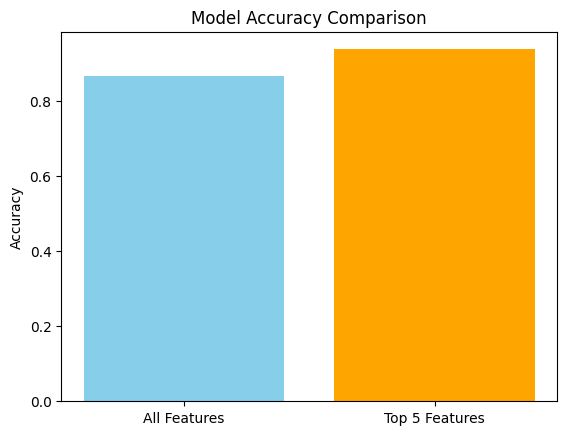

In [3]:
# --- Section 2: Vibe Coding - Feature Importance ---
fullModel = LogisticRegression(max_iter=10000)
fullModel.fit(X_train, y_train)
coefs = np.abs(fullModel.coef_[0])
top5_indices = np.argsort(coefs)[-5:]
top5_feature_names = data.feature_names[top5_indices]
print("\nTop 5 Important Features:", top5_feature_names)

X_top5 = data.data[:, top5_indices]
X_train_top5, X_test_top5, y_train, y_test = train_test_split(X_top5, y_all, random_state=42)
top5Model = LogisticRegression(max_iter=10000)
top5Model.fit(X_train_top5, y_train)
accuracy_top5 = top5Model.score(X_test_top5, y_test)

# --- Compare model accuracy ---
plt.bar(["All Features", "Top 5 Features"], [accuracy_full, accuracy_top5], color=["skyblue", "orange"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()